In [5]:
import numpy as np
import pandas as pd
import zipfile

In [6]:
zip_file = "Delhi_v2.csv.zip"
extract_file ="delhi_house"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_file)
    print("Extraction completed!")

Extraction completed!


In [7]:
data = pd.read_csv("delhi_house/Delhi_v2.csv")

In [8]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [9]:
data.shape

(7738, 18)

In [10]:
data.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [11]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Unnamed: 0
7737    1
0       1
1       1
2       1
3       1
       ..
14      1
13      1
12      1
11      1
10      1
Name: count, Length: 7738, dtype: int64
********************
price
4500000.0     290
3500000.0     252
4000000.0     247
6000000.0     243
5500000.0     223
             ... 
13300000.0      1
54000000.0      1
2520000.0       1
3280000.0       1
31900000.0      1
Name: count, Length: 584, dtype: int64
********************
Address
Raj Nagar Extension, Ghaziabad, Delhi NCR                                                        163
Indirapuram, Ghaziabad, Delhi NCR                                                                152
Greater Noida West, Greater Noida, Delhi NCR                                                     100
Noida Extension, Noida, Delhi NCR                                                                 63
Crossings Republik, Ghaziabad, Delhi NCR                                                          61
                                         

In [12]:
data.isna().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [13]:
data.drop(columns=["Lift"], inplace=True)

In [14]:
data.drop(columns=['parking'], inplace=True)

In [15]:
data.drop(columns=['Landmarks'], inplace=True)

In [16]:
data.drop(columns=['desc'], inplace=True)

In [17]:
data.drop(columns=['Address'], inplace=True)

In [19]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
data["Balcony_missing"] = data["Balcony"].isnull().astype(int)
data["Balcony"] = data["Balcony"].fillna(data["Balcony"].median())

In [26]:
data["Furnished_status"] = data["Furnished_status"].fillna("Unknown")

In [27]:
data["Status"] = data["Status"].fillna(data["Status"].mode()[0])

In [28]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Price_sqft,Balcony_missing
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.0
mean,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.284699,5543.660241,0.0
std,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,0.907924,2408.659307,0.0
min,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,2100.000000,0.0
25%,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,3950.986915,0.0
50%,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,4972.674332,0.0
75%,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,6350.638693,0.0
max,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,44378.698225,0.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   area              7738 non-null   float64
 2   latitude          7738 non-null   float64
 3   longitude         7738 non-null   float64
 4   Bedrooms          7738 non-null   float64
 5   Bathrooms         7738 non-null   float64
 6   Balcony           7738 non-null   float64
 7   Status            7738 non-null   object 
 8   neworold          7738 non-null   object 
 9   Furnished_status  7738 non-null   object 
 10  type_of_building  7738 non-null   object 
 11  Price_sqft        7738 non-null   float64
 12  Balcony_missing   7738 non-null   int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 786.0+ KB


In [30]:
data["Balcony"].value_counts()

Balcony
2.0     4365
3.0     1516
1.0     1082
4.0      613
5.0      130
6.0       21
7.0        4
10.0       3
8.0        3
9.0        1
Name: count, dtype: int64

In [149]:
data.to_csv("cleaned_delhi.csv")

In [150]:
data.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,Furnished_status,Landmarks,type_of_building,desc,location
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,2.0,Under Construction,New Property,NaN,NaN,Flat,\n\n\n Welcome ...,Noida Extension
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,2.0,Ready to Move,New Property,Semi-Furnished,NaN,Flat,\n\n\n Mapsko M...,Sector 79
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,2.0,Ready to Move,New Property,Unfurnished,NaN,Flat,\n\n\n This pro...,Vaishali
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,Unfurnished,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,Link Road
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,NaN,NaN,Flat,\n\n\n The prop...,Jaypee Pavilion Court Sector 128


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           7738 non-null   float64
 8   Status            7164 non-null   object 
 9   neworold          7738 non-null   object 
 10  Furnished_status  4124 non-null   object 
 11  Landmarks         2759 non-null   object 
 12  type_of_building  7738 non-null   object 
 13  desc              7738 non-null   object 
 14  location          7738 non-null   object 
dtypes: float64(7), object(8)
memory usage: 906.9+ KB


In [152]:
numeric_corr = data.select_dtypes(include=['number']).corr()
numeric_corr

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony
price,1.000000,0.849073,-0.227517,-0.331883,0.606914,0.691990,0.235497
area,0.849073,1.000000,-0.279069,-0.184427,0.683479,0.763650,0.355890
latitude,-0.227517,-0.279069,1.000000,0.401701,-0.140817,-0.246663,-0.161503
longitude,-0.331883,-0.184427,0.401701,1.000000,-0.166826,-0.205187,0.060208
Bedrooms,0.606914,0.683479,-0.140817,-0.166826,1.000000,0.765479,0.235499
Bathrooms,0.691990,0.763650,-0.246663,-0.205187,0.765479,1.000000,0.302583
Balcony,0.235497,0.355890,-0.161503,0.060208,0.235499,0.302583,1.000000


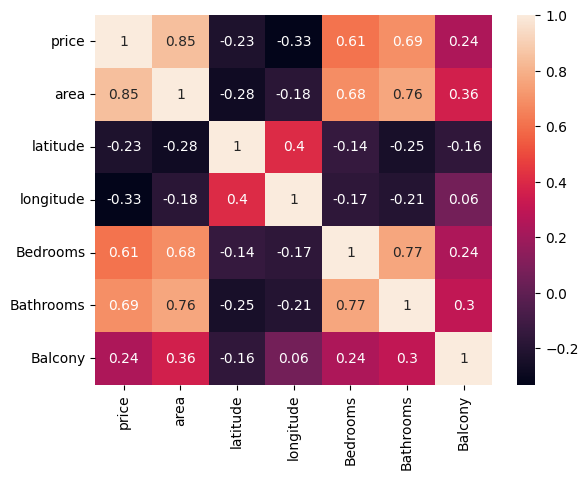

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [154]:
data['location'] = data['Address'].apply(
    lambda x: x.split(',')[-2].strip() if isinstance(x, str) and ',' in x else 'Unknown'
)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           7738 non-null   float64
 8   Status            7164 non-null   object 
 9   neworold          7738 non-null   object 
 10  Furnished_status  4124 non-null   object 
 11  Landmarks         2759 non-null   object 
 12  type_of_building  7738 non-null   object 
 13  desc              7738 non-null   object 
 14  location          7738 non-null   object 
dtypes: float64(7), object(8)
memory usage: 906.9+ KB


In [156]:
data.isnull().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status               574
neworold               0
Furnished_status    3614
Landmarks           4979
type_of_building       0
desc                   0
location               0
dtype: int64

In [157]:
data.drop(columns = ["desc"], inplace=True)

In [158]:
data.duplicated().sum()

np.int64(23)

In [159]:
data = data.drop_duplicates()

In [160]:
data.shape

(7715, 14)

<Axes: xlabel='price', ylabel='Count'>

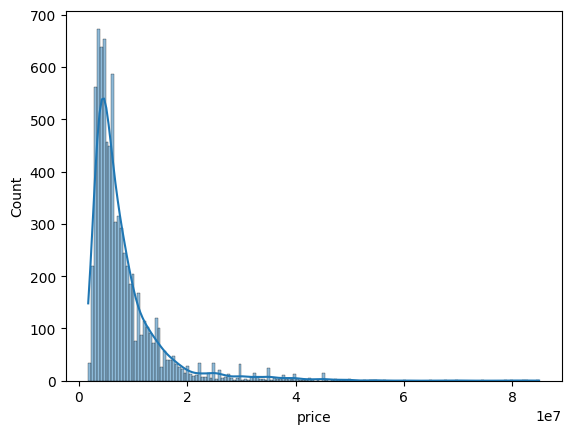

In [161]:
sns.histplot(data['price'], kde=True)

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [188]:
y = np.log(data["price"])
X = data.drop("price", axis=1)
data["price"] = np.log(data["price"])

In [189]:
X = X.drop(columns=['Address', 'Landmarks'])

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
print(X_train.shape)
print(X_test.shape)

(6172, 11)
(1543, 11)


In [192]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

pipe_lr = make_pipeline(
    column_trans,
    StandardScaler(),
    LinearRegression()
)

In [193]:
pipe_lr.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [194]:
y_pred_lr = pipe_lr.predict(X_test)

In [195]:
r2_score(y_test,y_pred_lr)

0.7839604157789043

In [196]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    Ridge(alpha=1.0)
)

pipe.fit(X_train, y_train)
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.7839633063406518

In [197]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    LassoCV(cv=5)
)

pipe.fit(X_train, y_train)
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.7839878927846523

In [198]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)
pipe = make_pipeline(
    column_trans,
    StandardScaler(),
    ElasticNetCV(cv=5)
)

In [199]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

pipe_rf = make_pipeline(
    column_trans,
    RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    )
)

In [200]:
pipe_rf.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [201]:
rf_pred = pipe_rf.predict(X_test)

In [202]:
r2_score(y_test, rf_pred)

0.9360797080456509

In [203]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

xgb_pipe = make_pipeline(
    column_trans,
    XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
)

In [204]:
xgb_pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [205]:
xgb_pred = xgb_pipe.predict(X_test)

In [206]:
r2_score(y_test, xgb_pred)

0.9379847697725099

In [207]:
pipe.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [208]:
y_pred_elastic = pipe.predict(X_test)

In [209]:
r2_score(y_test,y_pred_elastic)

0.7839935789363832

In [216]:
print("Lasso: ", r2_score(y_test, y_pred_lasso))
print("Ridge: ", r2_score(y_test, y_pred_ridge))
print("ElasticNet: ", r2_score(y_test, y_pred_elastic))
print("Linear:", pipe_lr.score(X_test, y_test))
print("Random Forest:", pipe_rf.score(X_test, y_test))
print("XGBoost:", xgb_pipe.score(X_test, y_test))

Lasso:  0.7839878927846523
Ridge:  0.7839633063406518
ElasticNet:  0.7839935789363832
Linear: 0.7839604157789043
Random Forest: 0.9360797080456509
XGBoost: 0.9379847697725099


In [217]:
import pickle

In [218]:
pickle.dump(pipe, open("RidgeModel.pkl", "wb"))